Before understanding what is a `Stationary` time series, there are concepts like `White Noise` and `Random Walk` that would help appreciate stationarity and define it.

`White Noise` is a time series where there is no pattern. Technically, it has `constant mean`, `constant variance` and `no autocorrelation`. [Autocorelation is correlation of a series with past version of itself]

Below is a way to generate white noise.  
`loc` is the mean while  
`scale` is the variance  
`size` is the length if the series


Text(0.5, 1.0, 'White Noise (mu=100,var=20)')

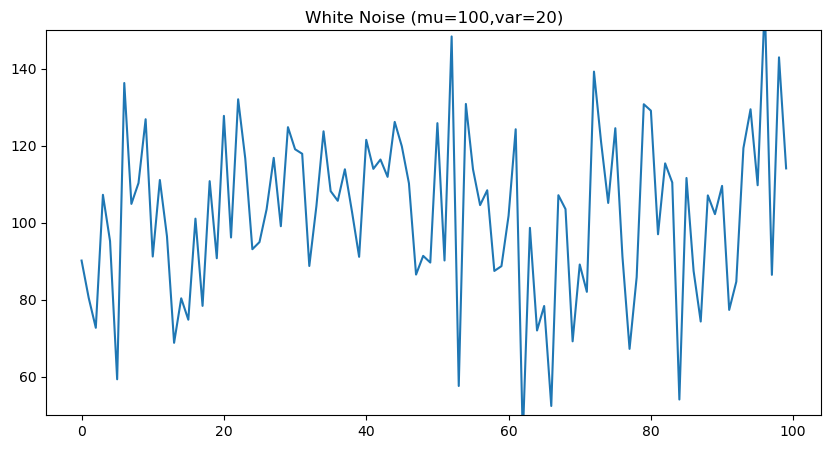

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wn = np.random.normal(loc=100,scale=20,size=100)
pd.Series(wn).plot(figsize=(10,5))
plt.ylim(50,150)
plt.title("White Noise (mu=100,var=20)")

Below creates a white noise with lower variance distributed around 100.

Text(0.5, 1.0, 'White Noise (mu=100,var=10)')

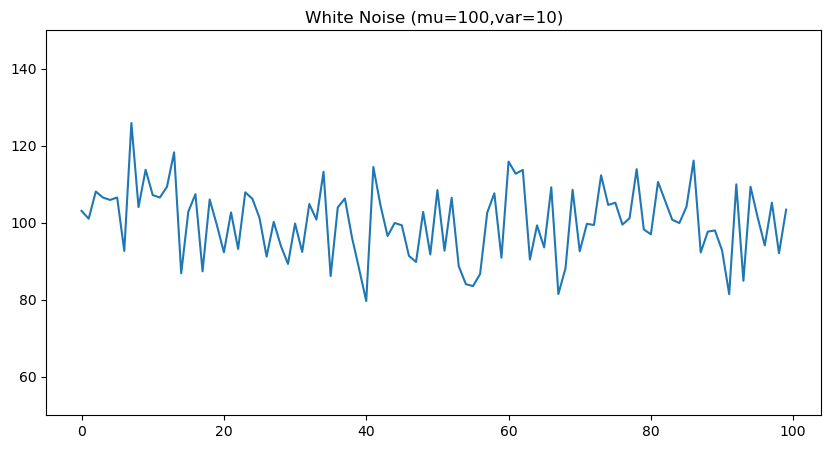

In [17]:
wn_narrow = np.random.normal(loc=100,scale=10,size=100)
pd.Series(wn_narrow).plot(figsize=(10,5))
plt.ylim(50,150)
plt.title("White Noise (mu=100,var=10)")

`Random Walk` is a kind of series that where the series may not be white noise, but the differences between the successive periods would form white noise.

<Axes: >

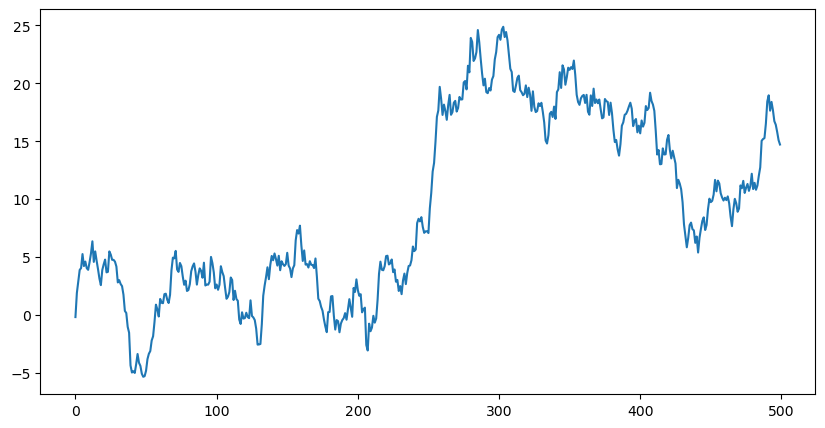

In [16]:
n = 500  # number of steps
steps = np.random.randn(n)  # normally distributed steps
walk = np.cumsum(steps)     # cumulative sum to simulate the walk

pd.Series(walk).plot(figsize=(10,5))

`Stationary Series` practically means the series has  

`Constant Mean`  
`Constant Variance`  
`Constant Autocovariance` - two values in a time series—separated by a certain time gap (lag) move together. 

Here is an `Example:` Covariance between period 1 and period 4 = Covariance between period 17 and period 21
Note that the gaps between 1,4 and 17,21 are same.

`White Noise` is a prime example of Stationary series. Recalling the assumptions for white noise are  
`constant mean`, `constant variance` and `no autocorrelation`.  

The `no autocorrelation` part is similar to `constant autocovariance` because   
**no** autocorrelation means **0** autocorrelation  which in turn means **constant** autocorrelation
and  
autocorrelation * `standard deviation` = autocovariance


**Augmented Dickey-Fuller (ADF)** test is a statistical test used to check whether a time series is stationary or non-stationary

`Null` Hypothesis (H₀) - Non-Stationary  
`Alternative` Hypothesis (H₁) - Stationary

In [20]:
from statsmodels.tsa.stattools import adfuller

Checking Stationarity of `White Noise` series

In [24]:
if adfuller(pd.Series(wn))[1]<0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Checking Stationarity of `Random Walk` series

In [29]:
if adfuller(pd.Series(walk))[1]<0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Non-Stationary


Checking stationarity of a market data

In [30]:
import pandas as pd
df = pd.read_csv("Index2018.csv")

In [31]:
df.head(3)

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25


Checking stationarity for `spx` series

In [35]:
if adfuller(pd.Series(df['spx']))[1]<0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Non-Stationary


In [54]:
# Creating a function for re-use
def adf_test(series):
    from statsmodels.tsa.stattools import adfuller
    if adfuller(series)[1]<0.05:
        return "Stationary"
    else:
        return "Non-Stationary"


**Making** the data stationary

There are few methods of achieving stationarity and we will try differencing, log transfirmation, box-cox transformation, seasonal decomposition, moving average smoothing. (These methods might need few adjustments of parameters before achieving stationnarity)

In [39]:
# Differencing
df['spx_diff'] = df['spx'].diff(1)

# Log Transformation
df['spx_log'] = np.log(df['spx'])

# Box-Cox Transformation
from scipy.stats import boxcox
df['spx_boxcox'], _ = boxcox(df['spx'])

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['spx'], model='additive', period=5)
df['spx_resid'] = result.resid

# Moving Average Smoothing
df['spx_smoothed'] = df['spx'].rolling(window=7).mean()

All such operations/transformations can create NA values. So doing a `fillna`

In [43]:
df.isna().sum(axis=0)

date            0
spx             0
dax             0
ftse            0
nikkei          0
spx_diff        1
spx_log         0
spx_boxcox      0
spx_resid       4
spx_smoothed    6
dtype: int64

In [44]:
df = df.fillna(method='ffill')
df.isna().sum(axis=0)

C:\Users\aravi\AppData\Local\Temp\ipykernel_19740\123405410.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


date            0
spx             0
dax             0
ftse            0
nikkei          0
spx_diff        1
spx_log         0
spx_boxcox      0
spx_resid       2
spx_smoothed    6
dtype: int64

In [45]:
df = df.fillna(method='bfill')
df.isna().sum(axis=0)

C:\Users\aravi\AppData\Local\Temp\ipykernel_19740\2830404465.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


date            0
spx             0
dax             0
ftse            0
nikkei          0
spx_diff        0
spx_log         0
spx_boxcox      0
spx_resid       0
spx_smoothed    0
dtype: int64

In [55]:
selected_columns = df.loc[:,df.columns.str.contains("spx")].columns.to_list()

for col in selected_columns:
    print(col,'is',adf_test(df[col]))

spx is Non-Stationary
spx_diff is Stationary
spx_log is Non-Stationary
spx_boxcox is Non-Stationary
spx_resid is Stationary
spx_smoothed is Non-Stationary


We are able to make the data stationary using `differencing` and `seasonal decomposition` without much tuning.